In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as pe
import plotly.graph_objects as pg
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/pizza_sales.csv')
data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
#What is the Total Revenue made on Sales
TR = data['total_price'].sum()

print(f"The total revenue made on sales is {TR}.")

The total revenue made on sales is 817860.05.


In [4]:
#What is Average Revenue
AR = data['total_price'].mean().round()

print(f"The average revenue made on sales is {AR}.")

The average revenue made on sales is 17.0.


In [5]:
#What is the Total number of Order made
TO = data['order_id'].count()

print(f"The Total number of orders made is {TO}.")

The Total number of orders made is 48620.


In [6]:
#What is the Average Order Value
AO = TR/TO

print(f"The Average order is {AO}.")


The Average order is 16.821473673385437.


Text(0.5, 1.0, 'Total Quantity Sold Per Month')

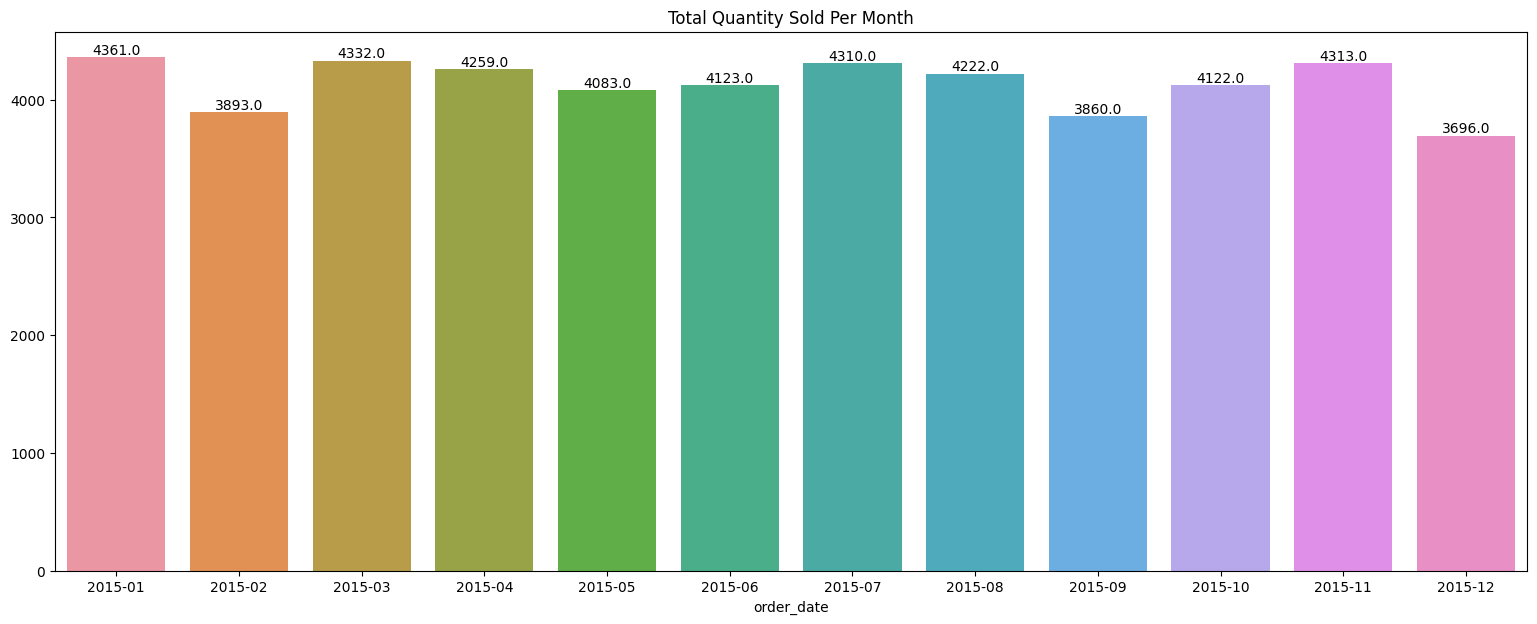

In [7]:
#What is the Total Quantity sold Patterns and Trends

#Converting order_date to datetime
data['order_date'] = pd.to_datetime(data['order_date'])

monthly_totals = data.groupby(data['order_date'].dt.to_period("M"))['quantity'].sum()

plt.figure(figsize = (19, 7))
fig = sns.barplot(x = monthly_totals.index, y = monthly_totals.values, ci = 0, estimator = 'sum')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Total Quantity Sold Per Month')

In [28]:
#Identifying the pizza size that generated the highest sales in the first quarter of the year


# data for the first quarter of 2015
year = 2015
first_quarter = data[(data['order_date'].dt.year == year) & (data['order_date'].dt.quarter == 1)]

# Group and sum sales by pizza size
sales_by_size = first_quarter.groupby('pizza_size')['total_price'].sum().round().reset_index()

# Identify the size with highest sales
Total_Sales_Q1 = sales_by_size[sales_by_size['total_price'] == sales_by_size['total_price']]


fig = pe.pie(data_frame = Total_Sales_Q1, names = 'pizza_size', values = 'total_price', color = 'pizza_size', title = 'Pizza size with the highest sales in Q1', hole = 0.2)
fig.show()


In [22]:
#Determining the pizza category that recorded the highest sales in December

# Filter data for December
december_data = data[data['order_date'].dt.month == 12]

# Group and sum sales by pizza category
sales_by_category = december_data.groupby('pizza_category')['total_price'].sum().reset_index()

# Identify the category with highest sales
Top_sales_category = sales_by_category[sales_by_category['total_price'] == sales_by_category['total_price']]

#Top_sales_category
fig = pe.pie(data_frame = Top_sales_category, names = 'pizza_category', values = 'total_price', color = 'pizza_category', title = 'Pizza Category with the highest sales in December', hole = 0.3)
fig.show()


In [65]:
#Analyze sales trends across different days of the week, months, days, and time periods.

# Group by month-year and calculate the total quantity sold for each month
data['Month'] = data['order_date'].dt.strftime('%Y-%m')
monthly_sales = data.groupby('Month')['quantity'].agg(total_quantity='sum')

monthly_sales

fig = pe.bar(data_frame = monthly_sales, x = monthly_sales.index, y = 'total_quantity', color = monthly_sales['total_quantity'], height = 500)
fig.show()

In [50]:
#Analyze sales trends across different days of the week, months, days, and time periods.
#Group by weeks and calculate the total quantity sold for each week

data['weekly'] = data['order_date'].dt.week
weekly_sales = data.groupby('weekly')['quantity'].agg(total_quantity='sum')

weekly_sales

,total_quantity
weekly,
1,587
2,1093
3,929
4,968
5,949
6,985
7,937
8,933
9,1031


In [54]:
#Analyze sales trends across different days of the week, months, days, and time periods.
#Group by days and calculate the total quantity sold for each week

data['Day'] = data['order_date'].dt.date
Daily_sales = data.groupby('Day')['quantity'].agg(total_quantity='sum')

Daily_sales

,total_quantity
Day,
2015-01-01,162
2015-01-02,191
2015-01-03,99
2015-01-04,135
2015-01-05,154
...,...
2015-12-27,89
2015-12-28,102
2015-12-29,80


In [36]:
#Identifying which pizza size exhibits the highest turnover rate in terms of quantity ordered

size = data.groupby('pizza_size')[['quantity']].sum().sort_values(by = 'quantity', ascending = False)

fig = pe.bar(data_frame = size, x = size.index, y = 'quantity', color = size.index, height = 600)
fig.show()


Text(0.5, 1.0, 'Average Unit Price Per Month')

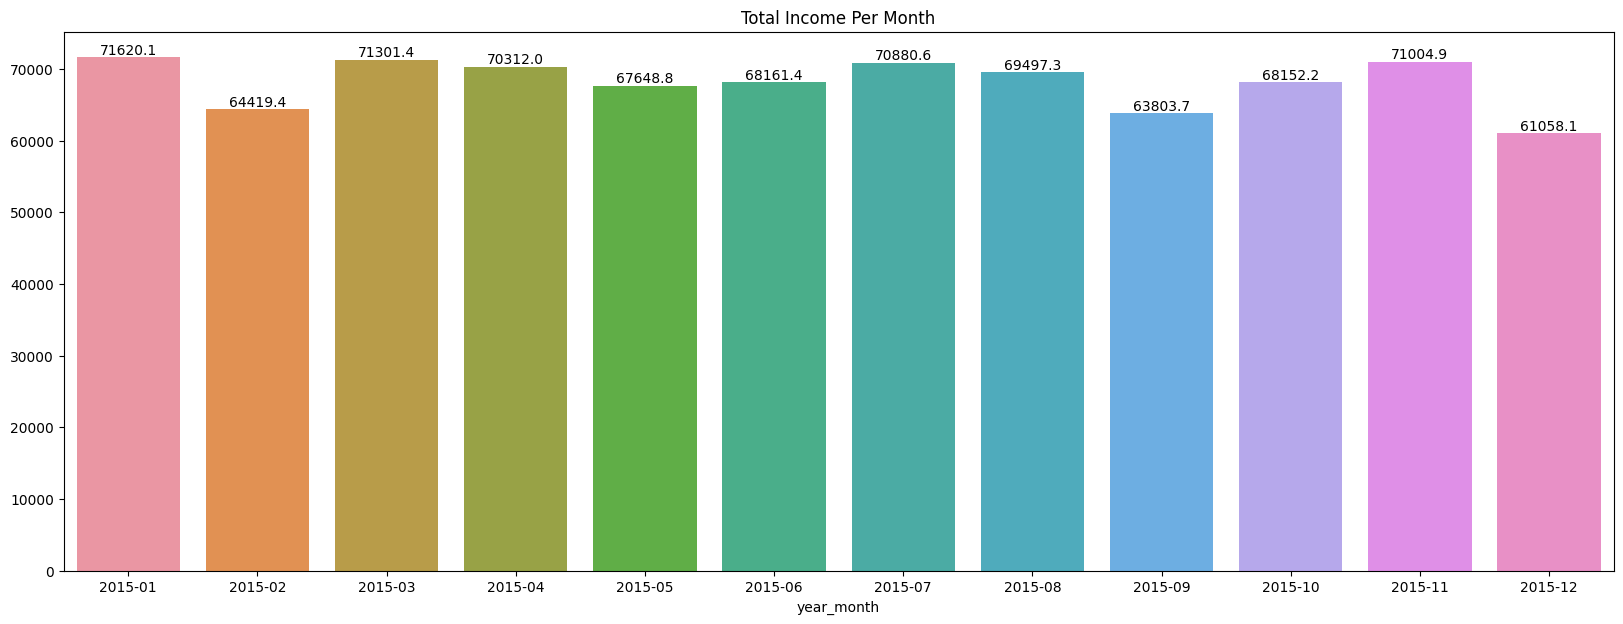

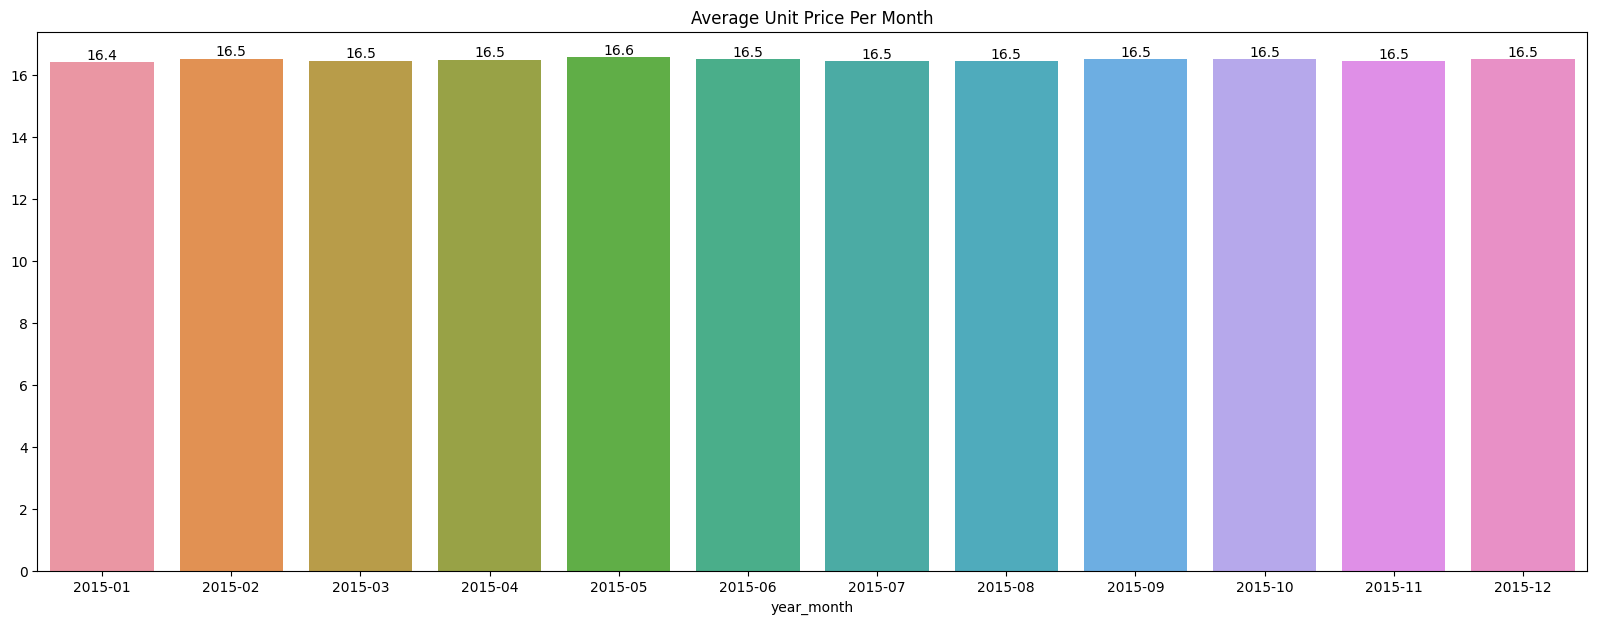

In [30]:
#Visualize the trajectory of total income over time and assessing how prices change as time progresse

# Calculate order income
data['order income'] = data['quantity'] * data['unit_price']

# Group by month-year and calculate total income for each month
data['year_month'] = data['order_date'].dt.strftime('%Y-%m')
monthly_income = data.groupby('year_month')['order income'].sum()


plt.figure(figsize = (20, 7))
fig = sns.barplot(x = monthly_income.index, y = monthly_income.values, ci = 0, estimator = 'sum')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Total Income Per Month')

# Group by month-year and calculate average unit price for each month
data['year_month'] = data['order_date'].dt.strftime('%Y-%m')
monthly_avg_price = data.groupby('year_month')['unit_price'].mean()

# Plot the average unit price trends over months
plt.figure(figsize = (20, 7))
fig = sns.barplot(x = monthly_avg_price.index, y = monthly_avg_price.values, ci = 0, estimator = 'sum')
fig.bar_label(fig.containers[0], fmt = '%.1f')
plt.title('Average Unit Price Per Month')
